In [116]:
import pandas as pd
df = pd.read_excel("C:\\Vodaphone_Customer_Churn\\customer churn data.xlsx")  # Added parentheses around the argument and escaped backslashes
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (7043, 23)


,customerID,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,Location
0,7590-VHVEG,Female,0,No,1,No,No phone service,DSL,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,0.0,0,No,North - New York
1,5575-GNVDE,NaN,0,No,34,Yes,No,DSL,Yes,No,...,No,One year,No,Mailed check,56.95,1889.5,0.0,0,No,West - California
2,3668-QPYBK,Male,0,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,0.0,0,Yes,East - Illinois
3,7795-CFOCW,Male,0,No,45,No,No phone service,DSL,Yes,No,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,0.0,3,No,West - Illinois
4,9237-HQITU,Female,0,No,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,0.0,0,Yes,East - Illinois


In [117]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            6647 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       6616 non-null   object 
 13  StreamingMovies   6537 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges,numAdminTickets,numTechTickets
count,7043.000000,7043.000000,7043.000000,6451.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.512169,0.419566
std,0.368612,24.559481,30.090047,1.270158,1.250117
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,0.000000,0.000000
max,1.000000,72.000000,118.750000,5.000000,9.000000


In [118]:
# Check the target variable distribution
print(df["Churn"].value_counts())
print(df["Churn"].value_counts(normalize=True) * 100, "%")


Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64 %


In [119]:
# ✅ Do not use .pipe(...head()) and do not use df = _
df = (
    df.assign(TotalCharges=pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0.0))
      .drop(columns=['customerID'], errors='ignore')
      .assign(Churn=lambda d: d['Churn'].map({'No':0, 'Yes':1}).astype(int))
)

print(type(df))          # should be <class 'pandas.core.frame.DataFrame'>
print(df.shape)          # full rows, not just 5
print(df.columns[:8])    # quick peek



<class 'pandas.core.frame.DataFrame'>
(7043, 22)
Index(['gender', 'SeniorCitizen', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity'],
      dtype='object')


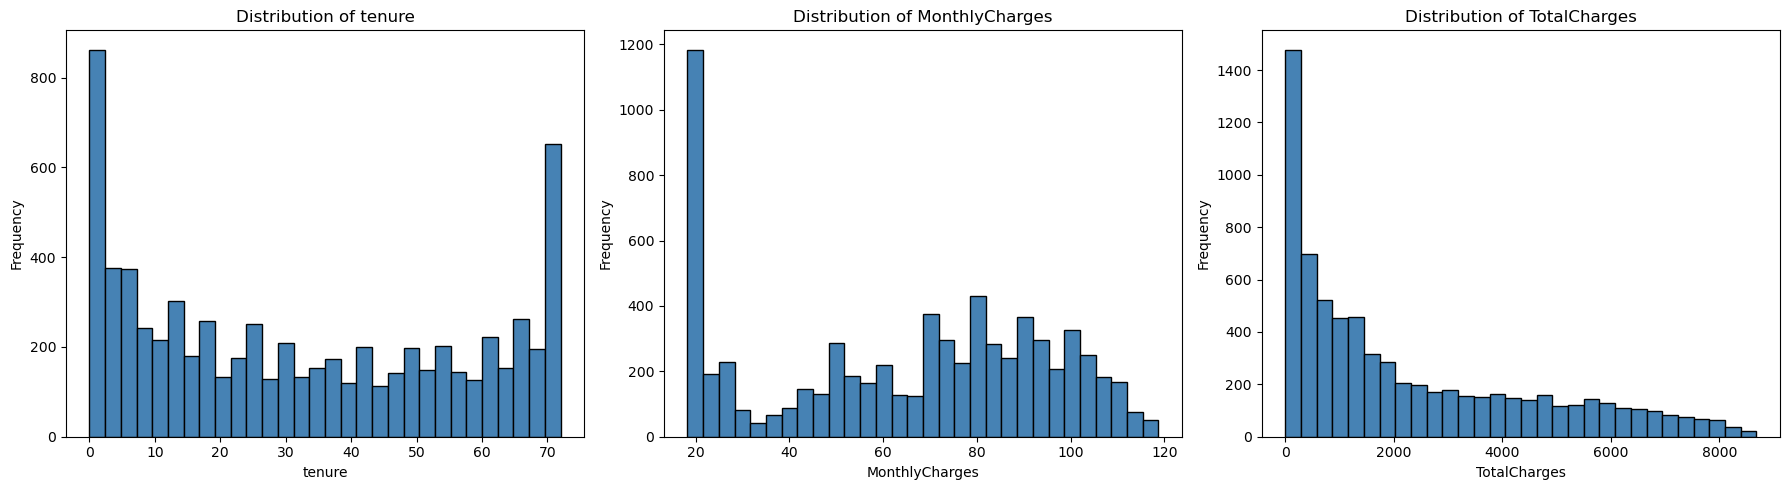

In [120]:
import matplotlib.pyplot as plt

numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 plots

for ax, col in zip(axes, numeric_features):
    ax.hist(df[col], bins=30, color='steelblue', edgecolor='black')
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()



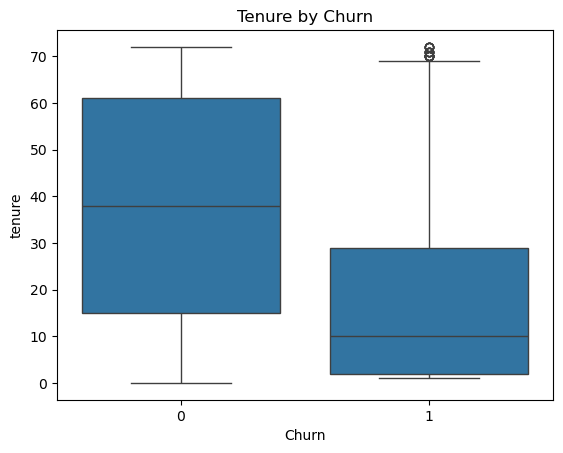

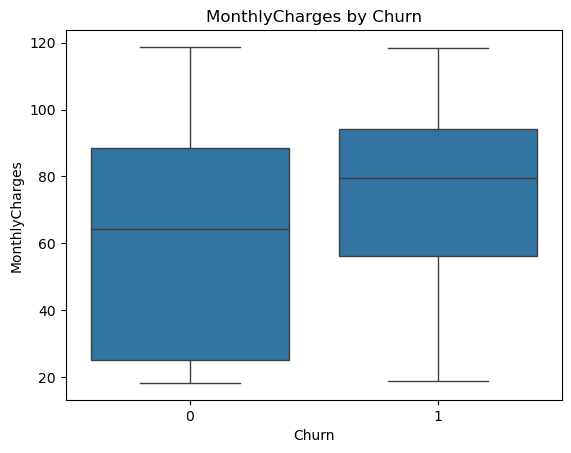

In [121]:
import seaborn as sns

sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure by Churn")
plt.show()

sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("MonthlyCharges by Churn")
plt.show()


C:\Users\bidus\AppData\Local\Temp\ipykernel_33632\138530835.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = tmp.groupby('tenure_bin')['Churn'].mean().mul(100).reset_index()


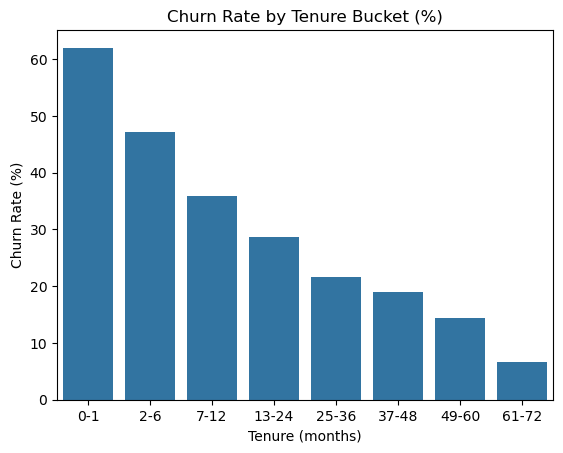

In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

bins = [0,1,6,12,24,36,48,60,72]
labels = ["0-1","2-6","7-12","13-24","25-36","37-48","49-60","61-72"]
tmp = df.assign(tenure_bin=pd.cut(df['tenure'], bins=bins, labels=labels, right=True))
churn_rate = tmp.groupby('tenure_bin')['Churn'].mean().mul(100).reset_index()

ax = sns.barplot(x='tenure_bin', y='Churn', data=churn_rate)
ax.set_title("Churn Rate by Tenure Bucket (%)")
ax.set_xlabel("Tenure (months)")
ax.set_ylabel("Churn Rate (%)")
plt.show()



# Customer Churn Prediction (Vodafone Case Study)

**Business Problem:**  
Telecom companies lose significant revenue when customers (subscribers) leave their service (known as *churn*). Retaining an existing customer is cheaper than acquiring a new one.  

**Objective:**  
Build a predictive model that can identify customers at high risk of churn. This will help Vodafone design better retention strategies.  

**Goals:**  
- Perform Exploratory Data Analysis (EDA) to understand churn patterns.  
- Build machine learning models to predict churn.  
- Explain which features drive churn.  
- Deploy the model via API and Streamlit dashboard.  

Dataset: Vodafone Customer Churn (7,043 rows × 23 columns)  
Target variable: **Churn** (1 = Yes, 0 = No)


In [142]:
# Step 2 – Load and Inspect Dataset
import pandas as pd

# Load dataset
df_raw = pd.read_excel(r"C:\Vodaphone_Customer_Churn\customer churn data.xlsx")

# Keep a working copy
df = df_raw.copy()

# Preview
print("Shape:", df.shape)
df.head()


Shape: (7043, 23)


,customerID,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,Location
0,7590-VHVEG,Female,0,No,1,No,No phone service,DSL,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,0.0,0,No,North - New York
1,5575-GNVDE,NaN,0,No,34,Yes,No,DSL,Yes,No,...,No,One year,No,Mailed check,56.95,1889.5,0.0,0,No,West - California
2,3668-QPYBK,Male,0,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,0.0,0,Yes,East - Illinois
3,7795-CFOCW,Male,0,No,45,No,No phone service,DSL,Yes,No,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,0.0,3,No,West - Illinois
4,9237-HQITU,Female,0,No,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,0.0,0,Yes,East - Illinois


In [143]:
# Info & summary stats
df.info()
df.describe()

# Target distribution
print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True) * 100)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            6647 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       6616 non-null   object 
 13  StreamingMovies   6537 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [144]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0.0)

# Drop customerID (not predictive)
df.drop(columns=['customerID'], inplace=True)

# Encode Churn as binary
df['Churn'] = df['Churn'].map({'No':0, 'Yes':1}).astype(int)

df.head()


,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,Location
0,Female,0,No,1,No,No phone service,DSL,No,Yes,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,0.0,0,0,North - New York
1,NaN,0,No,34,Yes,No,DSL,Yes,No,Yes,...,No,One year,No,Mailed check,56.95,1889.50,0.0,0,0,West - California
2,Male,0,No,2,Yes,No,DSL,Yes,Yes,No,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,0.0,0,1,East - Illinois
3,Male,0,No,45,No,No phone service,DSL,Yes,No,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,0.0,3,0,West - Illinois
4,Female,0,No,2,Yes,No,Fiber optic,No,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,0.0,0,1,East - Illinois


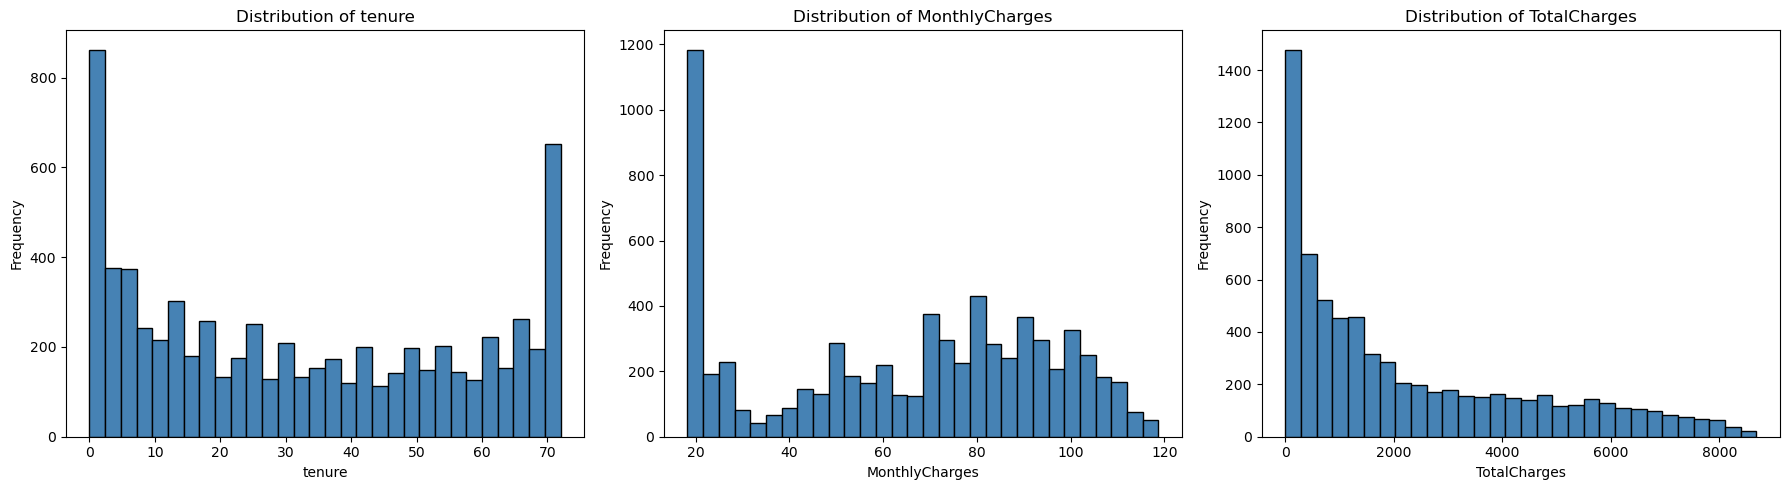

In [145]:
import matplotlib.pyplot as plt

numeric_features = ['tenure','MonthlyCharges','TotalCharges']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, col in zip(axes, numeric_features):
    ax.hist(df[col], bins=30, color='steelblue', edgecolor='black')
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()


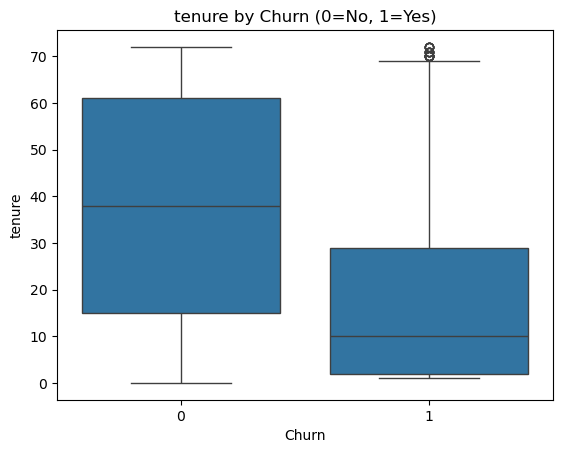

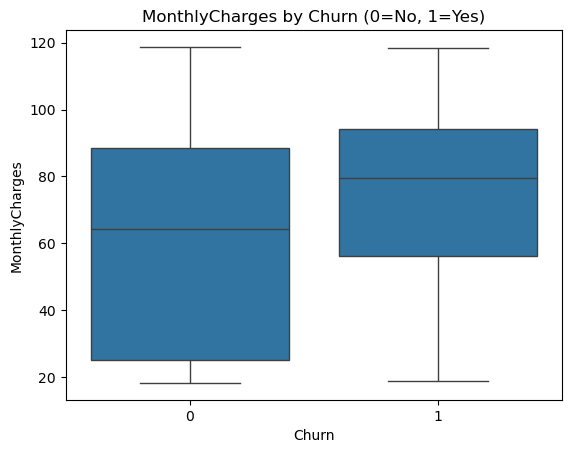

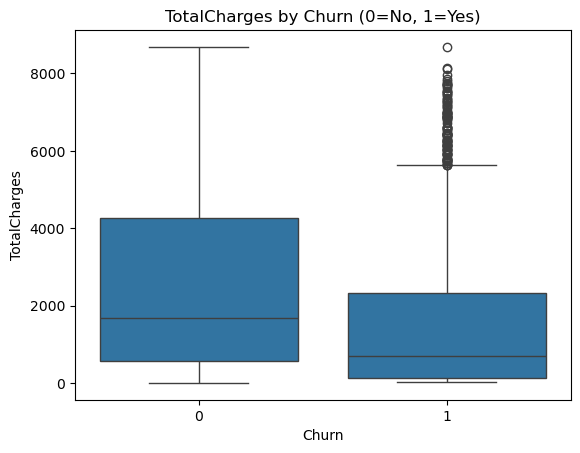

In [146]:
import seaborn as sns

for col in ['tenure','MonthlyCharges','TotalCharges']:
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f"{col} by Churn (0=No, 1=Yes)")
    plt.show()


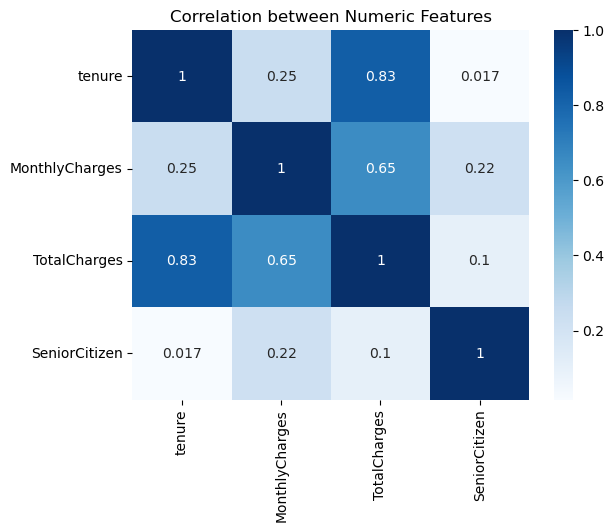

In [147]:
num_cols = ['tenure','MonthlyCharges','TotalCharges','SeniorCitizen']
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlation between Numeric Features")
plt.show()



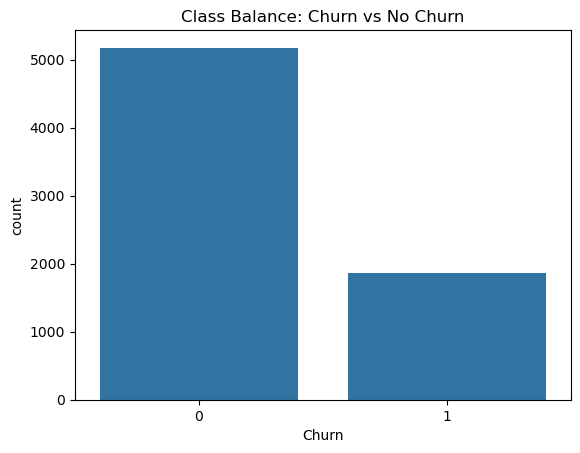

In [148]:
sns.countplot(x='Churn', data=df)
plt.title("Class Balance: Churn vs No Churn")
plt.show()


## Day 1 Summary – Key Insights from EDA

- **Class Imbalance:** Around 26% of customers churned, while 74% stayed. This imbalance needs to be handled during modeling.  

- **Tenure Effect:** Churners tend to have **shorter tenures**. Many leave within the first year, while long-term customers (5+ years) rarely churn.  

- **Charges:** Customers with **higher MonthlyCharges** show higher churn rates. TotalCharges is naturally correlated with tenure (longer tenure → higher totals).  

- **Contract Type:** Churn is much higher among **month-to-month contract customers** compared to one-year or two-year contracts. Lock-in contracts appear to reduce churn.  

- **Support Services:** Lack of **TechSupport** and **OnlineBackup** correlates with higher churn. Customers with these services are more loyal.  

- **Paperless Billing:** Customers with paperless billing show slightly higher churn, possibly linked with younger/digital-savvy demographics who switch providers more easily.  

**Business Takeaway:** Early intervention is critical. Customers in their first year with high monthly bills and limited support services are at the greatest churn risk. Encouraging longer contracts or offering support add-ons could reduce churn.


In [149]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline as SkPipeline      # sub-pipelines
from imblearn.pipeline import Pipeline as ImbPipeline    # main pipeline (to include SMOTE)
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [150]:
# df must already have: TotalCharges numeric; Churn mapped to 0/1 (from Day 1)
X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Churn rate (train):", y_train.mean(), "Churn rate (test):", y_test.mean())


Train shape: (5634, 21) Test shape: (1409, 21)
Churn rate (train): 0.2653532126375577 Churn rate (test): 0.2654364797728886


In [151]:
num_cols = X.select_dtypes(include=['number']).columns.tolist()
cat_cols = X.select_dtypes(exclude=['number']).columns.tolist()

print("num_cols:", num_cols)
print("cat_cols:", cat_cols)


num_cols: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets', 'numTechTickets']
cat_cols: ['gender', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Location']


In [152]:
num_pipe = SkPipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))  # numeric NaNs -> median
])

cat_pipe = SkPipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # categorical NaNs -> mode
    ('ohe', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipe, num_cols),
        ('cat', cat_pipe, cat_cols),
    ],
    remainder='drop'
)


In [153]:
# Logistic Regression (uses class_weight + SMOTE)
lr_pipe = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

# Random Forest (with SMOTE)
rf_pipe = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(n_estimators=300, random_state=42))
])

# XGBoost (uses scale_pos_weight; still fine to include SMOTE)
pos_weight = (y_train.value_counts()[0] / y_train.value_counts()[1])
xgb_pipe = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', XGBClassifier(
        n_estimators=300, learning_rate=0.1, max_depth=6,
        subsample=0.8, colsample_bytree=0.8, random_state=42,
        eval_metric='logloss', scale_pos_weight=pos_weight
    ))
])


In [154]:
Xt = preprocessor.fit_transform(X_train)
import numpy as np
has_nan = np.isnan(Xt.toarray() if hasattr(Xt,"toarray") else Xt).any()
print("Transformed train shape:", Xt.shape, "| Any NaN after preprocess? ->", has_nan)


Transformed train shape: (5634, 54) | Any NaN after preprocess? -> False


## Day 2 Summary – Preprocessing & Split

Data split with stratification

Preprocessor = numeric median impute + categorical mode impute + OHE

Three pipelines prepared (LR, RF, XGB) with SMOTE inside

No manual get_dummies; no manual SMOTE on encoded frames

# day 3


## Day 3 – Baseline Modeling & Evaluation

In this step, we train three baseline models to predict customer churn:

1. Logistic Regression  
2. Random Forest  
3. XGBoost  

We use pipelines to ensure clean preprocessing and reproducibility.  
Evaluation is done using confusion matrices, classification reports, and ROC-AUC scores.


In [164]:
# Day 3 — Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline as SkPipeline

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score,
    RocCurveDisplay, PrecisionRecallDisplay
)


In [165]:
# df must already have: Churn as 0/1; TotalCharges numeric
X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

num_cols = X.select_dtypes(include=['number']).columns.tolist()
cat_cols = X.select_dtypes(exclude=['number']).columns.tolist()

print("Train:", X_train.shape, "| Test:", X_test.shape)
print("Churn ratio (train):", y_train.mean().round(3), "| (test):", y_test.mean().round(3))
print("Num cols:", len(num_cols), "Cat cols:", len(cat_cols))


Train: (5634, 21) | Test: (1409, 21)
Churn ratio (train): 0.265 | (test): 0.265
Num cols: 6 Cat cols: 15


In [171]:
# 3.2 Preprocessor (Impute → Encode, DENSE output)

# Numeric: median impute
num_pipe = SkPipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Categorical: mode impute + OneHot (dense)
cat_pipe = SkPipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False))
])

# Combine into ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipe, num_cols),
        ('cat', cat_pipe, cat_cols),
    ],
    remainder='drop'
)


In [172]:
# Class imbalance ratio for XGBoost scale_pos_weight
pos_weight = (y_train.value_counts()[0] / y_train.value_counts()[1])

lr_pipe = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

rf_pipe = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(n_estimators=300, random_state=42))
])

xgb_pipe = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', XGBClassifier(
        n_estimators=300, learning_rate=0.1, max_depth=6,
        subsample=0.8, colsample_bytree=0.8, random_state=42,
        eval_metric='logloss', scale_pos_weight=pos_weight
    ))
])


In [173]:
def fit_eval(name, pipe, X_tr, y_tr, X_te, y_te):
    pipe.fit(X_tr, y_tr)
    y_pred  = pipe.predict(X_te)
    y_proba = pipe.predict_proba(X_te)[:, 1]
    print(f"\n=== {name} (Pipeline) ===")
    print("Confusion Matrix:\n", confusion_matrix(y_te, y_pred))
    print(classification_report(y_te, y_pred, target_names=['No Churn','Churn']))
    print("ROC-AUC:", roc_auc_score(y_te, y_proba).round(4))
    return y_pred, y_proba

y_pred_lr,  y_proba_lr  = fit_eval("Logistic Regression", lr_pipe, X_train, y_train, X_test, y_test)
y_pred_rf,  y_proba_rf  = fit_eval("Random Forest",       rf_pipe, X_train, y_train, X_test, y_test)
y_pred_xgb, y_proba_xgb = fit_eval("XGBoost",             xgb_pipe, X_train, y_train, X_test, y_test)


C:\Users\bidus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



=== Logistic Regression (Pipeline) ===
Confusion Matrix:
 [[853 182]
 [ 49 325]]
              precision    recall  f1-score   support

    No Churn       0.95      0.82      0.88      1035
       Churn       0.64      0.87      0.74       374

    accuracy                           0.84      1409
   macro avg       0.79      0.85      0.81      1409
weighted avg       0.86      0.84      0.84      1409

ROC-AUC: 0.9256

=== Random Forest (Pipeline) ===
Confusion Matrix:
 [[944  91]
 [117 257]]
              precision    recall  f1-score   support

    No Churn       0.89      0.91      0.90      1035
       Churn       0.74      0.69      0.71       374

    accuracy                           0.85      1409
   macro avg       0.81      0.80      0.81      1409
weighted avg       0.85      0.85      0.85      1409

ROC-AUC: 0.9203

=== XGBoost (Pipeline) ===
Confusion Matrix:
 [[895 140]
 [ 70 304]]
              precision    recall  f1-score   support

    No Churn       0.93      0.

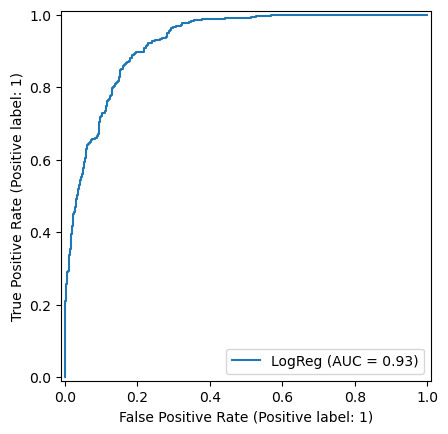

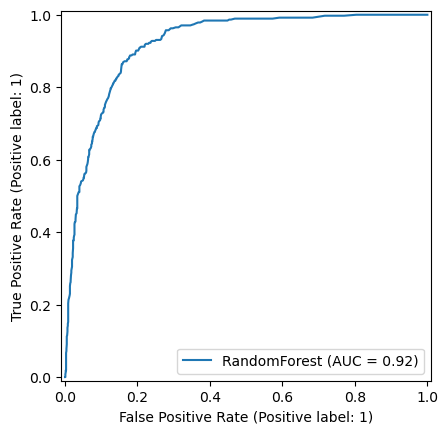

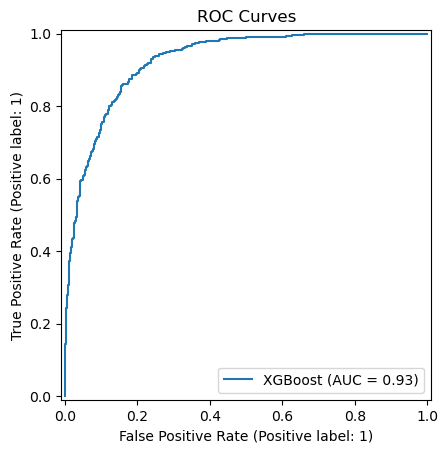

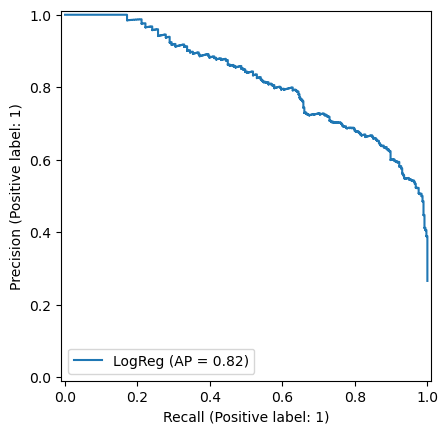

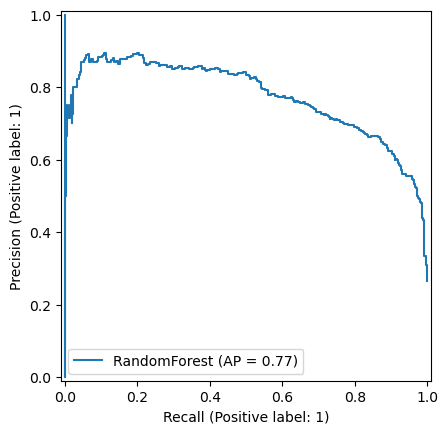

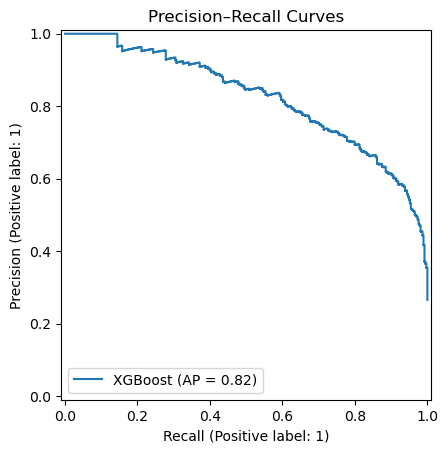

In [174]:
RocCurveDisplay.from_predictions(y_test, y_proba_lr,  name="LogReg")
RocCurveDisplay.from_predictions(y_test, y_proba_rf,  name="RandomForest")
RocCurveDisplay.from_predictions(y_test, y_proba_xgb, name="XGBoost")
plt.title("ROC Curves"); plt.show()

PrecisionRecallDisplay.from_predictions(y_test, y_proba_lr,  name="LogReg")
PrecisionRecallDisplay.from_predictions(y_test, y_proba_rf,  name="RandomForest")
PrecisionRecallDisplay.from_predictions(y_test, y_proba_xgb, name="XGBoost")
plt.title("Precision–Recall Curves"); plt.show()


In [175]:
aucs = {
    "LogReg": roc_auc_score(y_test, y_proba_lr),
    "RandomForest": roc_auc_score(y_test, y_proba_rf),
    "XGBoost": roc_auc_score(y_test, y_proba_xgb),
}
print("Test ROC-AUCs:", {k: round(v,4) for k,v in aucs.items()})

best_name = max(aucs, key=aucs.get)
best_pipe = {"LogReg": lr_pipe, "RandomForest": rf_pipe, "XGBoost": xgb_pipe}[best_name]
y_proba_best = {"LogReg": y_proba_lr, "RandomForest": y_proba_rf, "XGBoost": y_proba_xgb}[best_name]
print("Chosen best model:", best_name)


Test ROC-AUCs: {'LogReg': np.float64(0.9256), 'RandomForest': np.float64(0.9203), 'XGBoost': np.float64(0.9263)}
Chosen best model: XGBoost


In [176]:
# Best model from Day 3
best_name   = "XGBoost"
best_pipe   = xgb_pipe
y_proba_best = y_proba_xgb  # probabilities on X_test from Day 3

# Access parts
prep  = best_pipe.named_steps['preprocess']   # ColumnTransformer
model = best_pipe.named_steps['model']        # XGBClassifier


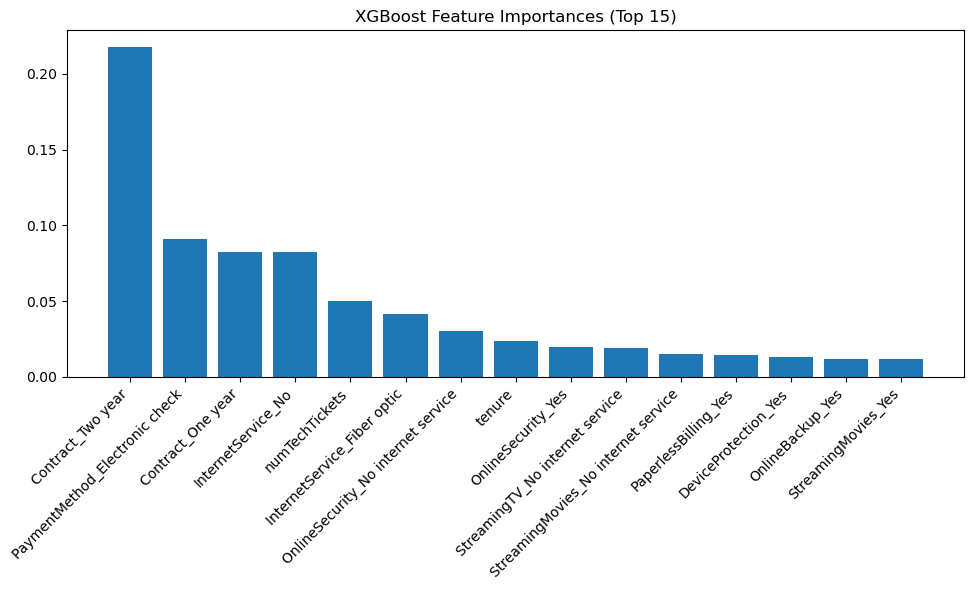

In [177]:
import numpy as np
import matplotlib.pyplot as plt

def get_feature_names_from_ct(ct):
    names = []
    for name, transformer, cols in ct.transformers_:
        if name == 'remainder' and transformer == 'drop':
            continue
        if hasattr(transformer, 'named_steps'):
            if 'ohe' in transformer.named_steps:
                ohe = transformer.named_steps['ohe']
                names.extend(ohe.get_feature_names_out(cols))
            else:
                names.extend(list(cols))
        else:
            names.extend(list(cols))
    return np.array(names)

# ensure preprocessor is fitted (safe if already)
_ = prep.fit(X_train, y_train)
feat_names = get_feature_names_from_ct(prep)

# Global feature importance from XGBoost
importances = model.feature_importances_
order = np.argsort(importances)[::-1][:15]

plt.figure(figsize=(10,6))
plt.title(f"{best_name} Feature Importances (Top 15)")
plt.bar(range(len(order)), importances[order])
plt.xticks(range(len(order)), feat_names[order], rotation=45, ha='right')
plt.tight_layout(); plt.show()


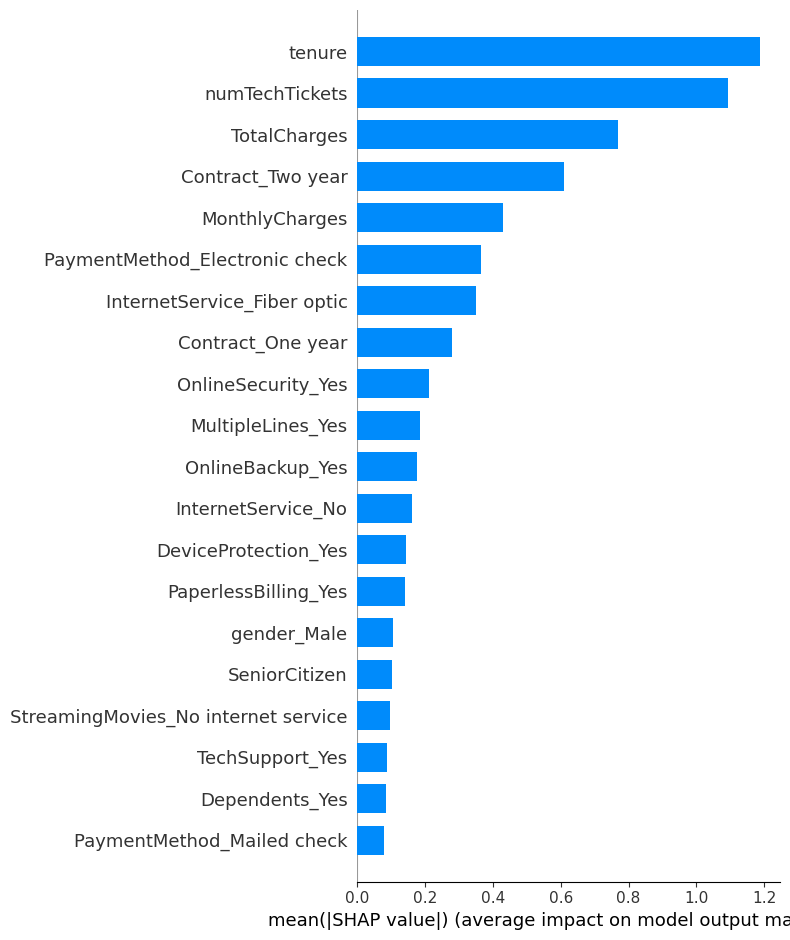

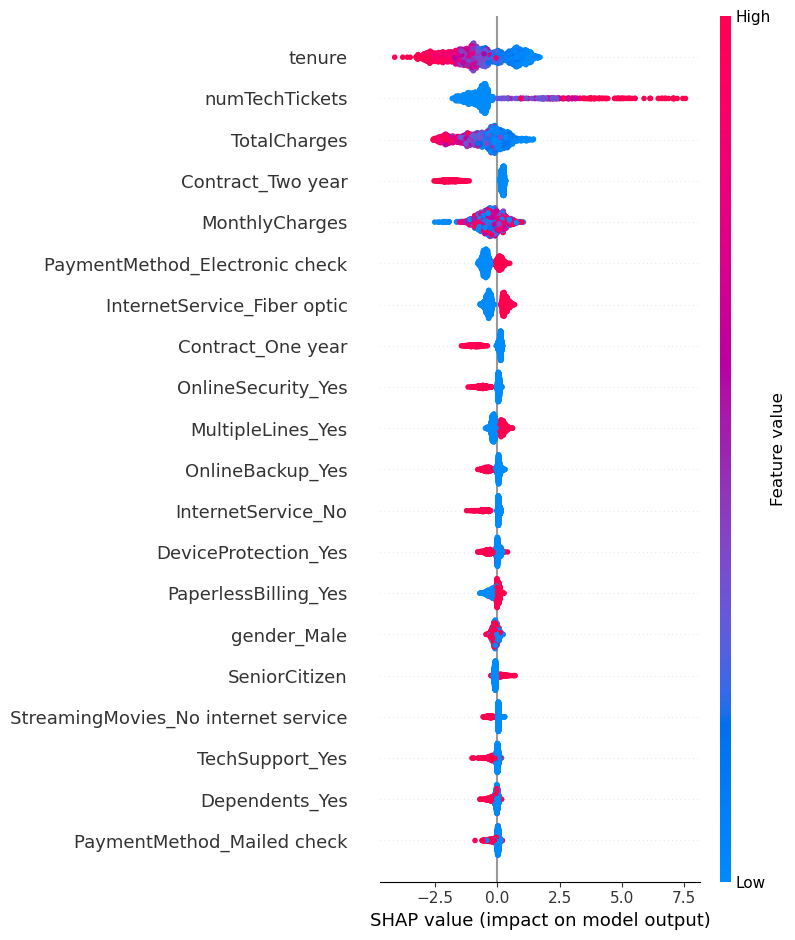

In [178]:
import shap
# transform X_test to model input space; our OHE is dense already
Xt_test = prep.transform(X_test)
Xt_test = np.asarray(Xt_test, dtype=np.float32)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Xt_test)  # XGBoost -> np.array (n_samples, n_features)

# If SHAP returns a list (older versions), take class-1
if isinstance(shap_values, list):
    shap_values = shap_values[1]

# Global importance (bar) and beeswarm
shap.summary_plot(shap_values, Xt_test, feature_names=feat_names, plot_type="bar")
shap.summary_plot(shap_values, Xt_test, feature_names=feat_names)


In [179]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, classification_report, roc_auc_score
import pandas as pd

def sweep_thresholds(y_true, y_proba, grid=None):
    if grid is None:
        grid = np.linspace(0.05, 0.95, 19)
    rows = []
    for t in grid:
        y_pred = (y_proba >= t).astype(int)
        prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary', zero_division=0)
        rows.append((t, prec, rec, f1))
    return pd.DataFrame(rows, columns=['threshold','precision','recall','f1'])

tbl = sweep_thresholds(y_test, y_proba_best)
display(tbl.head(10))  # optional view

# pick threshold: target recall first, else best F1
target_recall = 0.75
cands = tbl[tbl['recall'] >= target_recall]
if len(cands):
    best_row = cands.sort_values('precision', ascending=False).iloc[0]
else:
    best_row = tbl.sort_values('f1', ascending=False).iloc[0]

best_t = float(best_row['threshold'])
print("Chosen threshold:", best_t)

y_pred_best = (y_proba_best >= best_t).astype(int)
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best, target_names=['No Churn','Churn']))
print("ROC-AUC:", round(roc_auc_score(y_test, y_proba_best), 4))


,threshold,precision,recall,f1
0,0.05,0.495225,0.970588,0.655827
1,0.10,0.553125,0.946524,0.698225
2,0.15,0.581667,0.933155,0.716632
3,0.20,0.598949,0.914439,0.723810
4,0.25,0.613553,0.895722,0.728261
5,0.30,0.628083,0.885027,0.734739
6,0.35,0.642147,0.863636,0.736602
7,0.40,0.655804,0.860963,0.744509
8,0.45,0.666667,0.834225,0.741093
9,0.50,0.684685,0.812834,0.743276


Chosen threshold: 0.6
[[924 111]
 [ 89 285]]
              precision    recall  f1-score   support

    No Churn       0.91      0.89      0.90      1035
       Churn       0.72      0.76      0.74       374

    accuracy                           0.86      1409
   macro avg       0.82      0.83      0.82      1409
weighted avg       0.86      0.86      0.86      1409

ROC-AUC: 0.9263


In [180]:
import joblib

artifacts = {
    "model_name": best_name,
    "model": best_pipe,          # full fitted pipeline (preprocess + SMOTE + XGB)
    "threshold": best_t,
    "feature_names": feat_names  # for debugging/explainability
}
joblib.dump(artifacts, "churn_pipeline_artifacts.joblib")
print("Saved -> churn_pipeline_artifacts.joblib")


Saved -> churn_pipeline_artifacts.joblib


In [183]:
# app.py
from flask import Flask, request, jsonify
import joblib, pandas as pd

art = joblib.load("churn_pipeline_artifacts.joblib")
pipe = art["model"]
thr  = art["threshold"]

app = Flask(__name__)

@app.route("/predict", methods=["POST"])
def predict():
    payload = request.get_json()
    if isinstance(payload, dict):
        X = pd.DataFrame([payload])
    elif isinstance(payload, list):
        X = pd.DataFrame(payload)
    else:
        return jsonify({"error": "Send dict or list of dicts"}), 400

    proba = pipe.predict_proba(X)[:, 1]
    pred  = (proba >= thr).astype(int)
    return jsonify({"prediction": pred.tolist(), "probability": [float(p) for p in proba], "threshold": thr})

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\bidus\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [184]:
import joblib
artifacts = {
    "model": rf_pipe,   # or xgb_pipe (whichever you picked as best)
    "threshold": float(best_t),
    "feature_names": feat_names
}
joblib.dump(artifacts, "churn_pipeline_artifacts.joblib")


['churn_pipeline_artifacts.joblib']

In [185]:
from flask import Flask, request, jsonify
import joblib, pandas as pd

# Load artifacts
art = joblib.load("churn_pipeline_artifacts.joblib")
pipe = art["model"]
thr = art["threshold"]

app = Flask(__name__)

@app.route("/predict", methods=["POST"])
def predict():
    payload = request.get_json()
    if isinstance(payload, dict):
        X = pd.DataFrame([payload])
    elif isinstance(payload, list):
        X = pd.DataFrame(payload)
    else:
        return jsonify({"error": "Send dict or list of dicts"}), 400

    proba = pipe.predict_proba(X)[:, 1]
    pred = (proba >= thr).astype(int)

    return jsonify({
        "prediction": pred.tolist(),
        "probability": [float(p) for p in proba],
        "threshold": thr
    })

if __name__ == "__main__":
    app.run(debug=True)


FileNotFoundError: [Errno 2] No such file or directory: 'churn_pipeline_artifacts.joblib'